In [1]:
from src.houses import *
from src.agents import *
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker # to remove 1e6 base from the x axis on plots

In [5]:
n = 1_000_000
agents = generate_agents(n)
size = sys.getsizeof(agents)
print(f"The agents array takes up {size} bytes of memory, which is {size/(1024**3):.6f} GB of memory")
print(agents)

The agents array takes up 43000112 bytes of memory, which is 0.040047 GB of memory
[(     0,  591887.23006707, 7, 60, False, 0., 0., 0., 0.6495132 )
 (     1,   19974.40803378, 0, 59, False, 0., 0., 0., 0.753276  )
 (     2,  271922.48711802, 5, 99, False, 0., 0., 0., 0.7635317 ) ...
 (999997,  199023.70211956, 4, 97, False, 0., 0., 0., 0.7494505 )
 (999998, 1349876.4146616 , 9, 50, False, 0., 0., 0., 0.68599546)
 (999999,  179939.09976556, 4, 72, False, 0., 0., 0., 0.74754936)]


In [6]:
freq, total = get_freq_and_total(agents)
agents = check_happiness(agents, freq, total)
print(agents)

[(     0,  591887.23006707, 7, 60, False, 0., 0., 0., 0.6495132 )
 (     1,   19974.40803378, 0, 59,  True, 0., 0., 0., 0.753276  )
 (     2,  271922.48711802, 5, 99,  True, 0., 0., 0., 0.7635317 ) ...
 (999997,  199023.70211956, 4, 97,  True, 0., 0., 0., 0.7494505 )
 (999998, 1349876.4146616 , 9, 50, False, 0., 0., 0., 0.68599546)
 (999999,  179939.09976556, 4, 72,  True, 0., 0., 0., 0.74754936)]


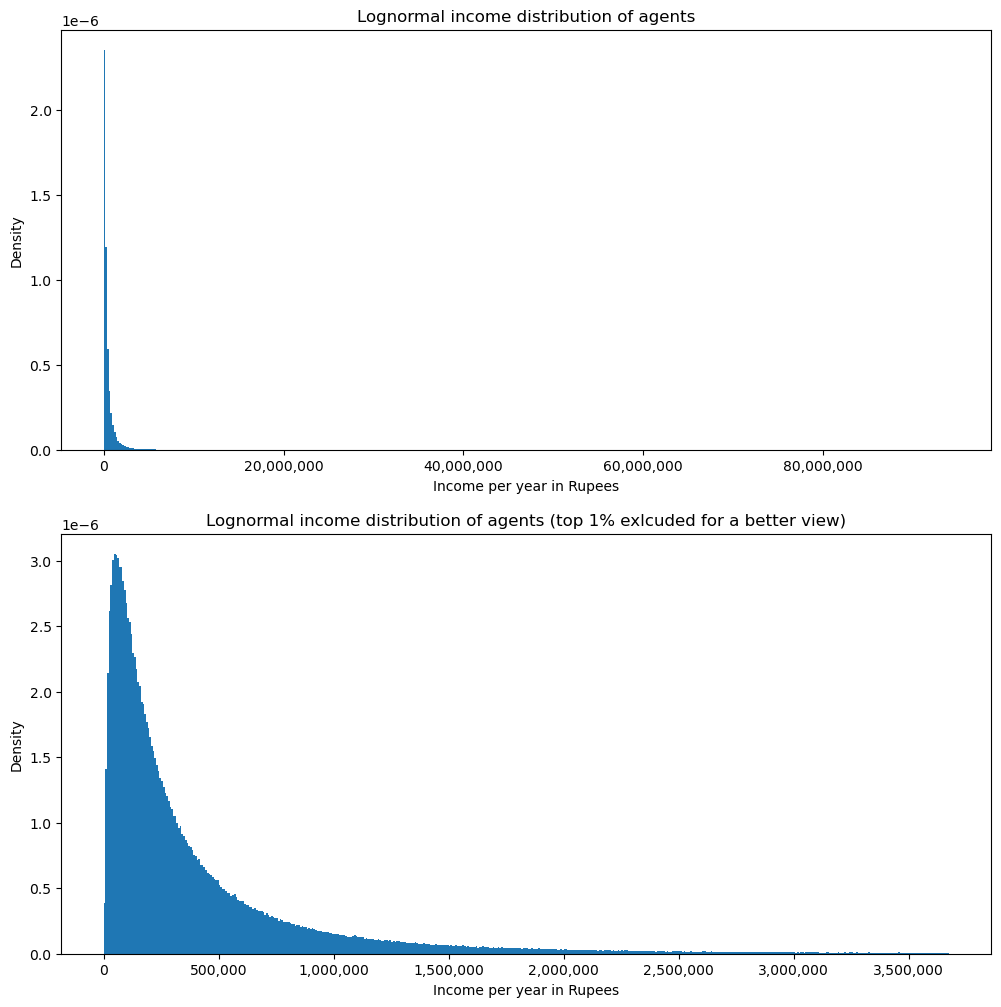

In [16]:
# plot the lognormal agents income distribution
incomes = agents["income"]

# Cut off at, say, the 99.99th percentile for visualization
cutoff = np.percentile(incomes, 99.0)
incomes_percentile = incomes[incomes <= cutoff]

fig, axes = plt.subplots(2,1,figsize = (12,12)) # one plot for actual income distr, one with top 1% cut off
axes[0].hist(incomes, bins = 500, density = True)
axes[0].set_title("Lognormal income distribution of agents")
axes[0].set_xlabel("Income per year in Rupees")
axes[0].set_ylabel("Density")
# format x-axis numbers with commas
axes[0].xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))

# with top 1% cut off
axes[1].hist(incomes_percentile, bins = 500, density = True)
axes[1].set_title("Lognormal income distribution of agents (top 1% exlcuded for a better view)")
axes[1].set_xlabel("Income per year in Rupees")
axes[1].set_ylabel("Density")
axes[1].xaxis.set_major_formatter(mticker.StrMethodFormatter('{x:,.0f}'))
plt.show()